In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Data/train.csv', index_col='datetime', parse_dates=True)

In [3]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
## Examine Target Variable ##

In [7]:
from scipy import stats
from scipy.stats import norm

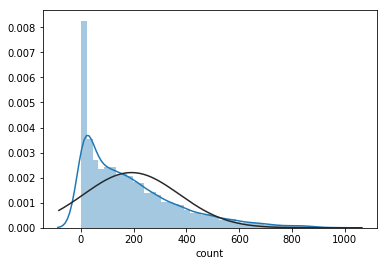

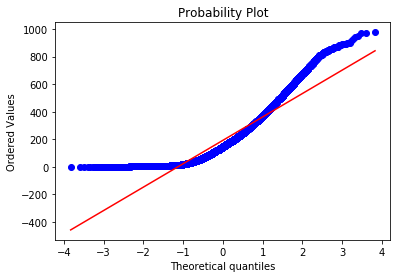

In [8]:
sns.distplot(train['count'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['count'], plot=plt)

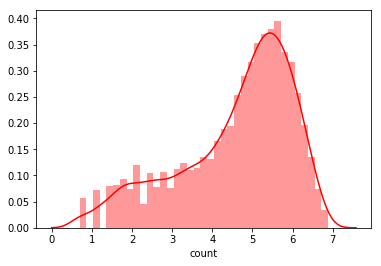

In [9]:
SingleLog_y = np.log1p(train['count'])              
sns.distplot(SingleLog_y, color ="r")

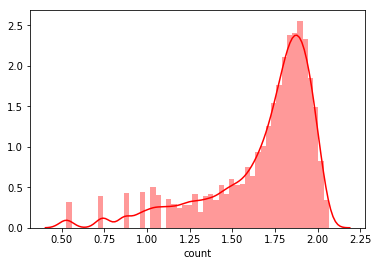

In [10]:
DoubleLog_y = np.log1p(SingleLog_y)
sns.distplot(DoubleLog_y, color ="r")

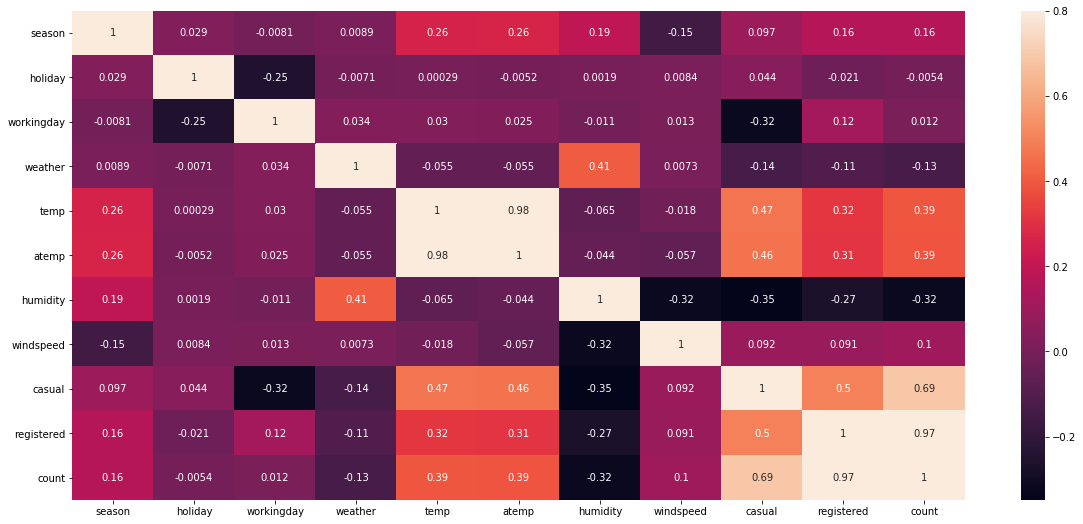

In [11]:
#correlation matrix
cmatrix = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cmatrix, vmax=.8, annot=True);

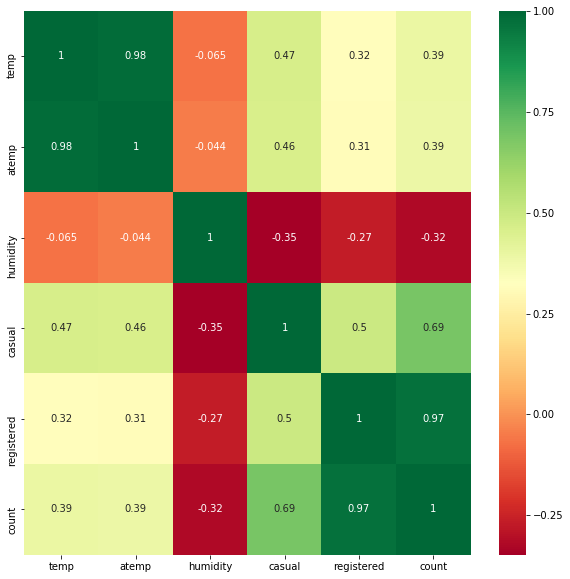

In [12]:
# most correlated features
cmatrix = train.corr()
topFeatures = cmatrix.index[abs(cmatrix['count'])>0.3]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[topFeatures].corr(),annot=True,cmap='RdYlGn')

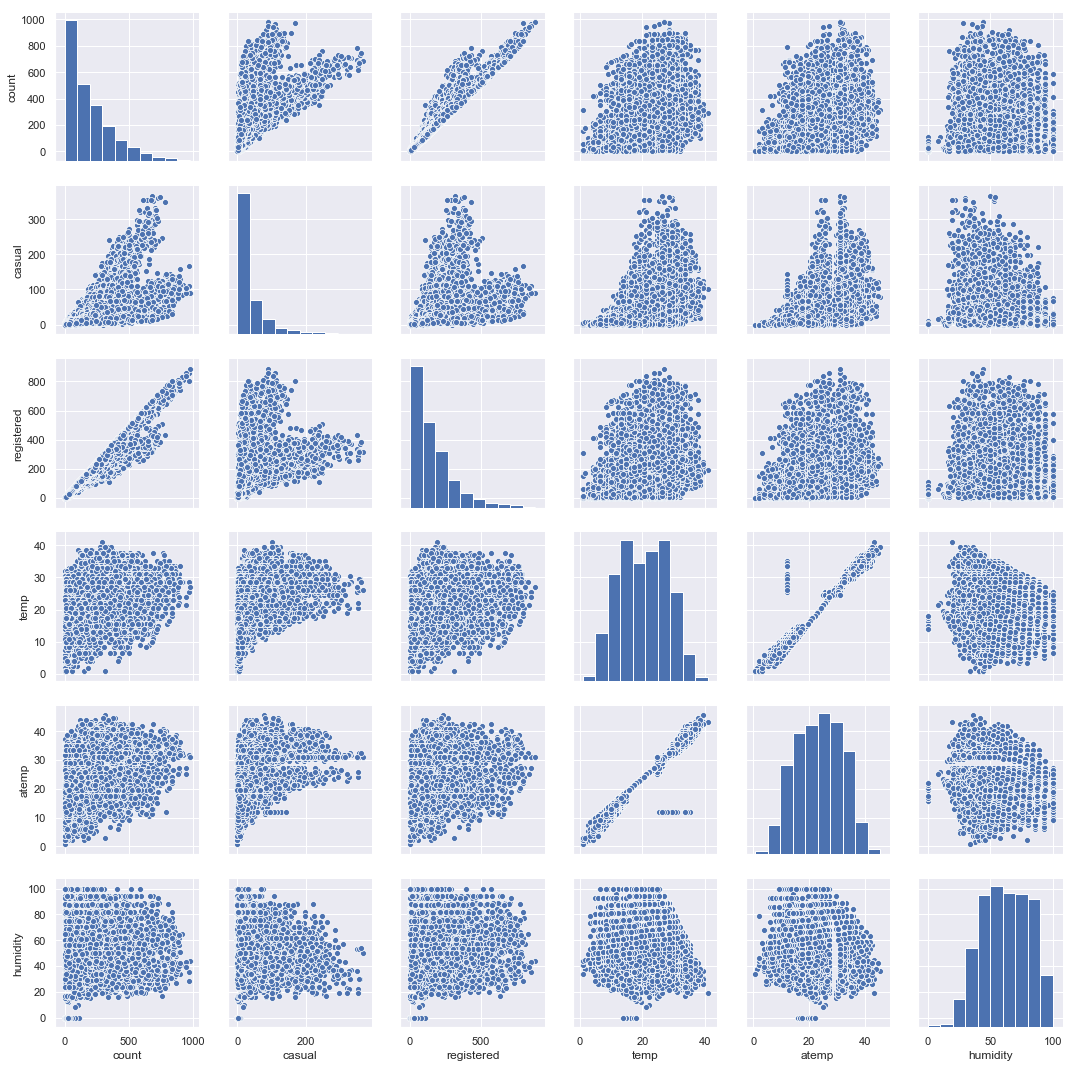

In [14]:
sns.set()
cols = ['count', 'casual', 'registered', 'temp', 'atemp', 'humidity']
sns.pairplot(train[cols], height = 2.5)
plt.show();

In [23]:
train = train.fillna(train.mean())

In [ ]:
##  Linear Regression  ##

In [15]:
# X (data) and y (target)
X = train[['casual', 'registered', 'temp', 'atemp', 'humidity']]
y = train['count'].values.reshape(-1, 1)
print(X.shape, y.shape)

(10886, 5) (10886, 1)


In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.1)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

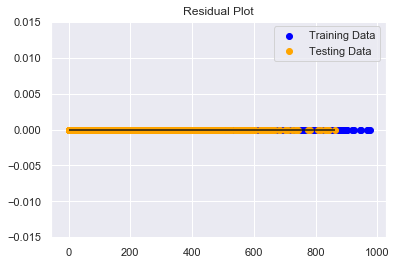

In [18]:
# Make predictions using the X_testdata
# Plot y_test_scaled vs y_test
# Scatter plot y_test vs predictions

predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 5.771096844814551e-26, R2: 1.0


In [20]:
##Optional Model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 8.846358468990925e-08, R2: 0.9999999999970206
